In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import wavfile as wav
from IPython.display import Audio

In [7]:
Audio("../assets/Audio/Input/B_1_1_529.wav", rate=48000)

In [2]:
fs, sample = wav.read('../assets/Audio/Input/B_1_1_529.wav')

In [3]:
t = np.linspace(0., sample.shape[0] / fs, sample.shape[0])
t.shape

(60960,)

<Axes: >

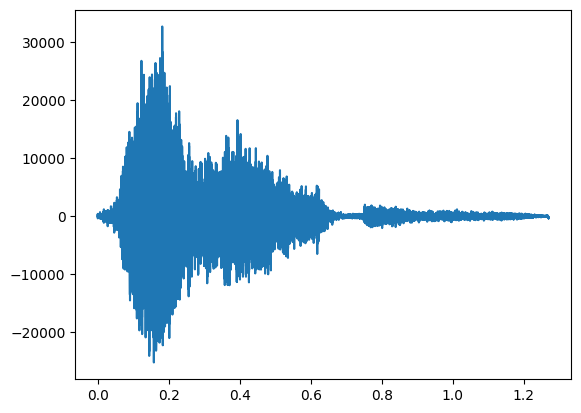

In [4]:
sns.lineplot(x=t, y=sample[:,0])

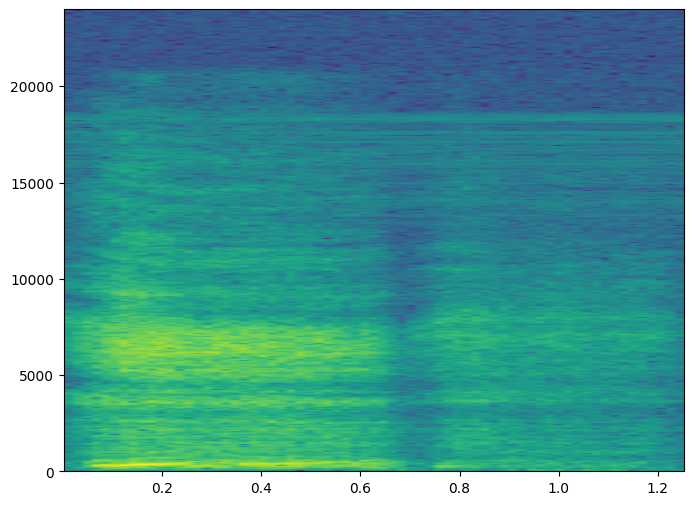

In [16]:
NFFT = 1024
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
Pxx, freqs, bins, im = ax.specgram(sample[:,0], NFFT=NFFT, Fs=fs)

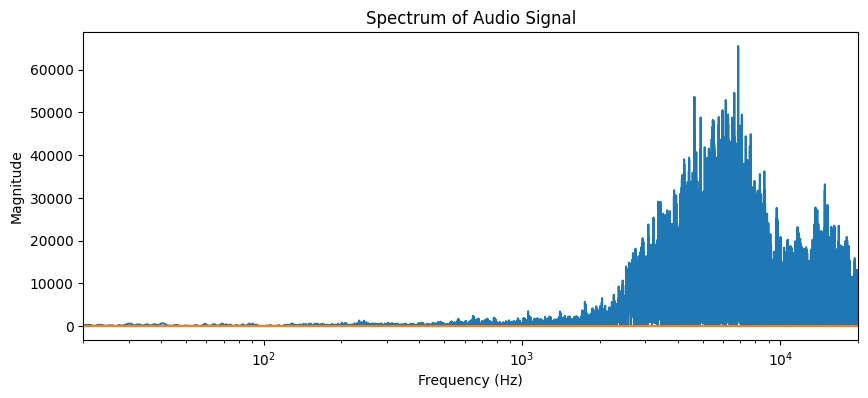

In [8]:
spectrum = np.fft.fft(sample)


# Compute the frequencies associated with the FFT values
frequencies = np.fft.fftfreq(len(spectrum), 1/fs)

# Filter out only the positive frequencies
positive_freq_idxs = np.where(frequencies > 0)

plt.figure(figsize=(10, 4))
plt.plot(frequencies[positive_freq_idxs], np.abs(spectrum[positive_freq_idxs]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Spectrum of Audio Signal')
plt.xscale('log')
plt.xlim([20, 20000]) 
plt.show()

In [11]:
from scipy.signal import spectrogram 

f, t, Sxx = spectrogram(sample[:,0] / max(sample[:,0]), fs=fs)

Text(0.5, 0, 'Time [sec]')

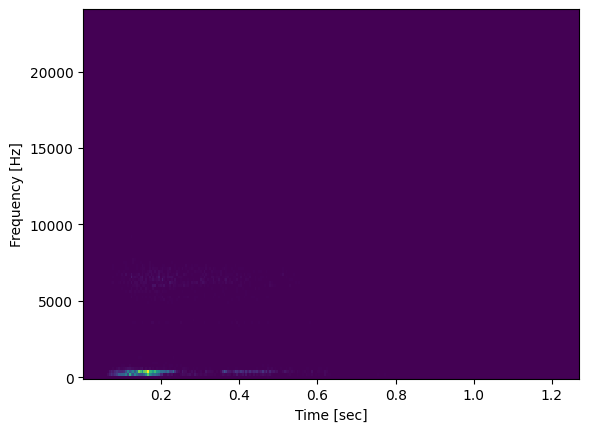

In [12]:
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')